# TD5 - Adèle Marcon

## Liste des couleurs présentes dans une image et leur fréquence

Cette première partie permet de définir une méthode d'affichage pour la suite: soit en ligne, soit en grille

In [138]:
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def afficher_images(images, titres=None, disposition='ligne', colonnes=3, taille_fig=(15, 5)):
    imgs = []
    for img in images:
        imgs.append(img)
    
    n_images = len(imgs)
    
    if titres is None:
        titres = [f'Image {i+1}' for i in range(n_images)]
    
    if disposition == 'ligne':
        lignes, cols = 1, n_images
        taille_fig = (taille_fig[0], taille_fig[1])
    elif disposition == 'grille':
        cols = min(colonnes, n_images)
        lignes = (n_images + cols - 1) // cols
        taille_fig = (taille_fig[0], taille_fig[1] * lignes / 2)
    else:
        raise ValueError("disposition doit être 'ligne' ou 'grille'")
    
    fig, axes = plt.subplots(lignes, cols, figsize=taille_fig)
    
    if n_images == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if hasattr(axes, 'flatten') else axes
    for i, (img, titre) in enumerate(zip(imgs, titres)):
        axes[i].imshow(img)
        axes[i].set_title(titre, fontsize=12, pad=10)
        axes[i].axis('off')
    for i in range(n_images, len(axes) if hasattr(axes, '__len__') else 1):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()


Cette deuxième partie permet de charger les images, je décide de créer im2 et im3 pour naviguer plus facilement entre les versions rétouchées et originales de chaque image

Le choix des images repose sur plusieurs critères: une diversité des couleurs et une visualisation rapide des différentes couleurs, une complexité de dégradé pour la première image et une complexité de diversité importante des couleurs pour la deuxième image

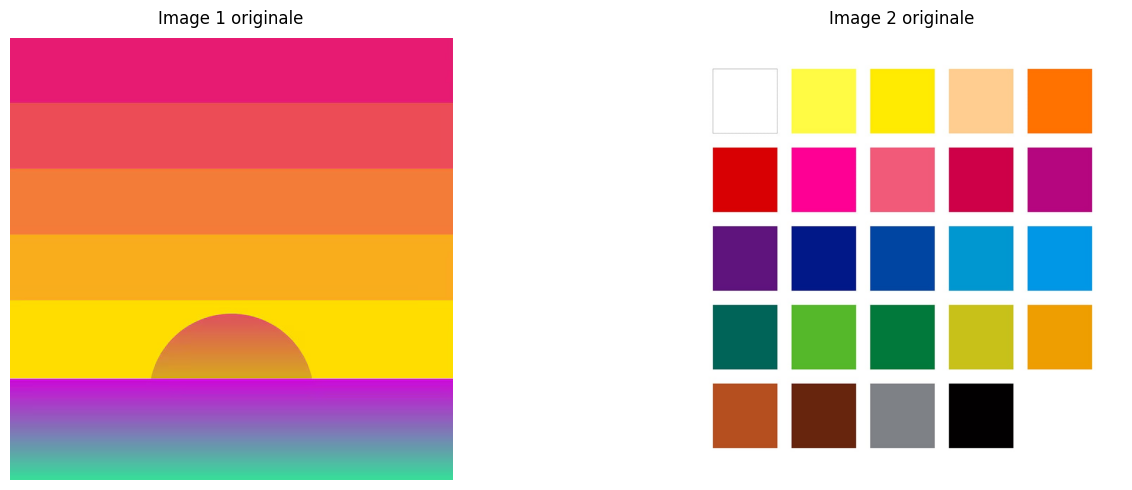

In [139]:
# On charge les images
im1 = Image.open("soleil.jpg").convert("RGB")
px1 = im1.load()
im2 = Image.new('RGB', (im1.width, im1.height)) 
px2 = im2.load()
im3 = Image.new('RGB', (im1.width, im1.height)) 
px3 = im3.load()
W1, H1 = im1.size

im4 = Image.open("couleurs.jpg").convert("RGB")
px4 = im4.load()
im5 = Image.new('RGB', (im4.width, im4.height)) 
px5 = im5.load()
im6 = Image.new('RGB', (im4.width, im4.height)) 
px6 = im6.load()
W2, H2 = im4.size


# Afficher en ligne
afficher_images(
    [im1, im4],
    titres=['Image 1 originale', 'Image 2 originale'],
    disposition='ligne'
)


Cette troisième partie du code permet de créer un dictionnaire possédant pour clés les couleurs et pour valeur leur fréquence d'apparition dans l'image

In [140]:
def couleurs_presentes(px,W,H):
    couleurs = {}
    for x in range (W):
        for y in range (H):
            if px[x,y] not in couleurs:
                couleurs[px[x,y]] = 1
            else:
                couleurs[px[x,y]] += 1
    return couleurs

## Présentation d'une méthode naïve de construction d'une palette de $k$ couleurs et affichage de la palette

In [141]:
def choix_palette(n,px,W,H):
    D = couleurs_presentes(px,W,H)
    C = [(k,v) for k,v in D.items()]
    C = C[:n]
    C.sort(key = lambda x: x[1])
    for k,v in D.items():
        if v > C[0][1]:
            C[0] = (k,v)
            C.sort(key = lambda x: x[1])
    return C

In [142]:
k = 10
C1 = choix_palette(k,px1,W1,H1)
C2 = choix_palette(k,px4,W2,H2)

def draw_rectangle(rgb_color):
    color = f'rgb({rgb_color[0]}, {rgb_color[1]}, {rgb_color[2]})'
    html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{color}" /></svg>'
    return html

html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{f'rgb({C2[0][0][0]}, {C2[0][0][1]}, {C2[0][0][2]})'}" /></svg>'
for i in range (1,k):
    html += draw_rectangle(C1[i][0])
display(HTML(html))

html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{f'rgb({C2[0][0][0]}, {C2[0][0][1]}, {C2[0][0][2]})'}" /></svg>'
for i in range (1,k):
    html += draw_rectangle(C2[i][0])
display(HTML(html))


## Recoloriage de chaque image grâce à la palette obtenue par méthode naïve - choix d'un calcul de distance euclidien

In [143]:
from math import sqrt
def distance(c1: tuple, c2: tuple) -> float:
    r1,g1,b1 = c1
    r2,g2,b2 = c2
    return sqrt((r2-r1)**2 + (g2-g1)**2 + (b2-b1)**2)

In [144]:
def recoloriage(px, px2, W, H, k):
    C = choix_palette(k, px, W, H) 
    for x in range(W):
        for y in range(H):
            choix = C[0][0]
            for c in C:
                if distance(px[x,y], choix) > distance(px[x,y], c[0]):
                    choix = c[0]
            px2[x,y] = choix

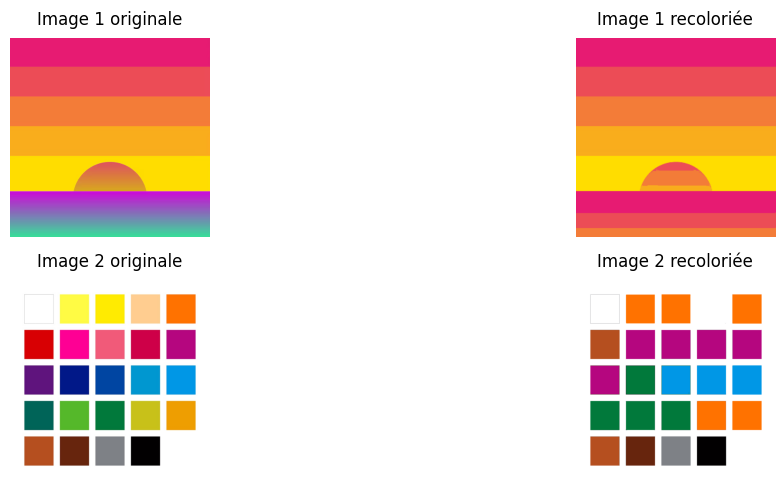

In [145]:
recoloriage(px1,px2,W1,H1,10)
recoloriage(px4,px5,W2,H2,10)

afficher_images(
    [im1, im2, im4,im5],
    titres=['Image 1 originale','Image 1 recoloriée','Image 2 originale','Image 2 recoloriée'],
    disposition='grille',
    colonnes=2
)

## Calcul d'un score pour chaque image et représentation de ce score


In [146]:
def score(px,px2,W,H,k):
    S = 0
    N = W*H
    for x in range (W):
        for y in range (H):
            S += distance(px[x,y],px2[x,y])
    print(f"Le score de l'image {k} est:", (256 - S/N)/256)

In [147]:
score(px1,px2,W1,H1,1)
score(px4,px5,W2,H2,2)

Le score de l'image 1 est: 0.8544392395261857
Le score de l'image 2 est: 0.8823569559836902


In [148]:
def score_image(px,px2,W,H):
    for x in range(W):
        for y in range (H):
            d = distance(px[x,y],px2[x,y])
            d = int(d)
            if W == W1:
                px3[x,y] = (d,0,0)
            if W == W2:
                px6[x,y] = (d,0,0)

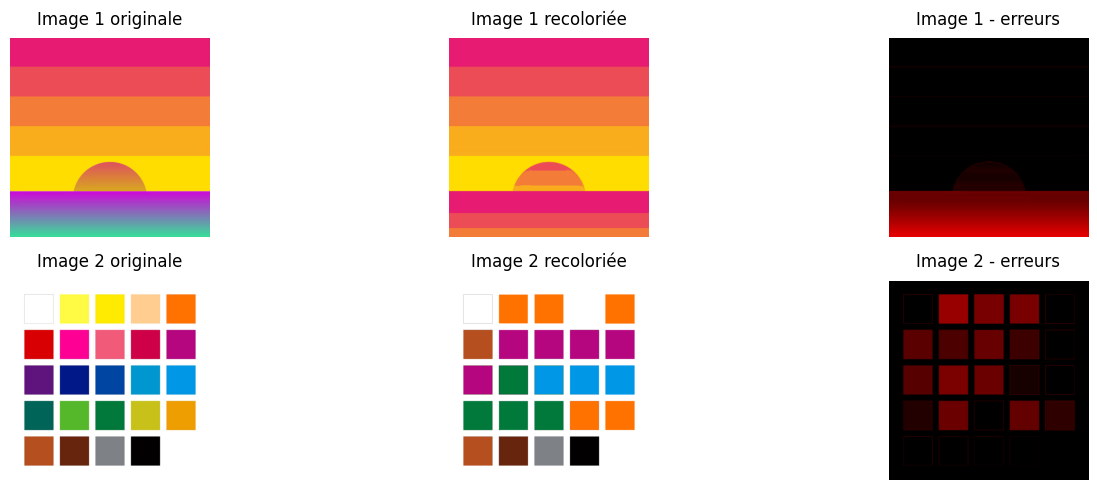

In [149]:
score_image(px1,px2,W1,H1)
score_image(px4,px5,W2,H2)
afficher_images(
    [im1, im2, im3, im4,im5, im6],
    titres=['Image 1 originale','Image 1 recoloriée','Image 1 - erreurs','Image 2 originale','Image 2 recoloriée','Image 2 - erreurs'],
    disposition='grille',
    colonnes=3
)

## Deuxième méthode pour choisir la palette


In [150]:
def choix_palette2(n,px,W,H,i):
    D = couleurs_presentes(px,W,H)
    C = [(k,v) for k,v in D.items()]
    C = C[:i*n]
    C.sort(key = lambda x: x[1])
    for k,v in D.items():
        if v > C[0][1]:
            C[0] = (k,v)
            C.sort(key = lambda x: x[1])
    L = []
    for k in range (n):
        L.append(C[i*k + 1])
    return L

In [151]:
k = 10
C1 = choix_palette2(k,px1,W1,H1,3)

from IPython.display import display, HTML

def draw_rectangle(rgb_color):
    color = f'rgb({rgb_color[0]}, {rgb_color[1]}, {rgb_color[2]})'
    html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{color}" /></svg>'
    return html

html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{f'rgb({C1[0][0][0]}, {C1[0][0][1]}, {C1[0][0][2]})'}" /></svg>'
for i in range (1,k):
    html += draw_rectangle(C1[i][0])
display(HTML(html))

C2 = choix_palette2(k,px4,W2,H2,3)

html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{f'rgb({C2[0][0][0]}, {C2[0][0][1]}, {C2[0][0][2]})'}" /></svg>'
for i in range (1,k):
    html += draw_rectangle(C2[i][0])
display(HTML(html))


On répète les étapes précédentes pour comparer les résultats obtenus

In [152]:
def recoloriage2(px,px2,W,H,k,palette):
    for x in range(W):
        for y in range (H):
            choix = palette[0][0]
            for c in palette:
                if distance(px[x,y],choix) > distance(px[x,y],c[0]):
                    choix = c[0]
            px2[x,y] = choix

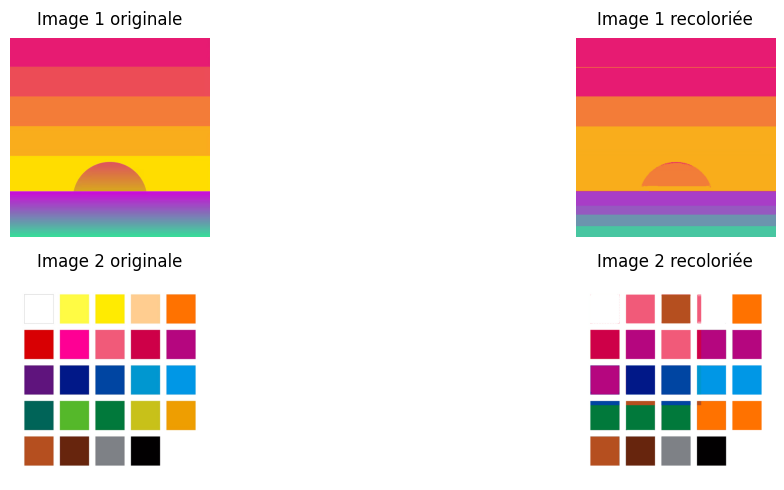

In [153]:
recoloriage2(px1,px2,W1,H1,100,C1)
recoloriage2(px4,px5,W1,H1,100,C2)

afficher_images(
    [im1, im2, im4,im5],
    titres=['Image 1 originale','Image 1 recoloriée','Image 2 originale','Image 2 recoloriée'],
    disposition='grille',
    colonnes=2
)

In [154]:
score(px1,px2,W1,H1,1)
score(px4,px5,W2,H2,2)

Le score de l'image 1 est: 0.9121610637472928
Le score de l'image 2 est: 0.9037310203285439


Le score de chaque image à été amélioré par rapport à la méthode naïve

## Comparaison des méthodes obtenues avec une méthode existante: fonction quantize de PIl

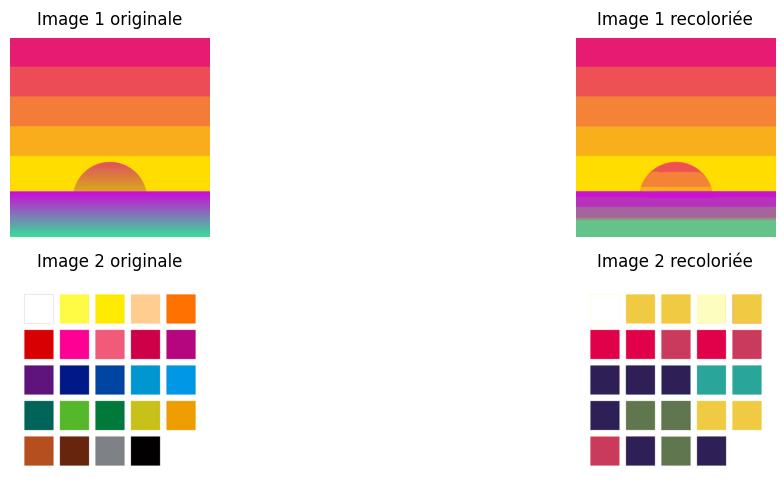

In [155]:
im_quantize1 = im1.quantize(colors=10).convert("RGB")
im_quantize2 = im4.quantize(colors=10).convert("RGB")
afficher_images(
    [im1, im_quantize1, im4,im_quantize2],
    titres=['Image 1 originale','Image 1 recoloriée','Image 2 originale','Image 2 recoloriée'],
    disposition='grille',
    colonnes=2
)

In [156]:
px7 = im_quantize1.load()
px8 = im_quantize2.load()

score(px1,px7,W1,H1,1)
score(px4,px8,W2,H2,2)

Le score de l'image 1 est: 0.9513629279024471
Le score de l'image 2 est: 0.8565612976787099


## Pré-traitement des images: Lissage et Flou Gaussien

### Lissage

In [157]:
from math import sqrt
def distance(c1: tuple, c2: tuple) -> float:
    r1,g1,b1 = c1
    r2,g2,b2 = c2

    return sqrt((r2-r1)**2 + (g2-g1)**2 + (b2-b1)**2)

In [158]:
def floodFill(w: int, h: int, start_x: int, start_y: int, seuil: int, px, px2) -> tuple:
    directions = [(-1,0),(1,0),(0,-1),(1,0),(-1,-1),(-1,1),(1,1),(-1,-1)]
    visited = set()
    not_visited = {(start_x,start_y)}
    unique_colors_used = set()
    while not_visited:
        q = [not_visited.pop()]
        c = px[q[0][0],q[0][1]]
        unique_colors_used.add(c)
        while q:
            x,y = q.pop()
            visited.add((x,y))
            px2[x,y] = c
            for dirx, diry in directions:
                tx, ty = x + dirx, y + diry
                if (0 <= tx < w) and (0<= ty < h):
                    if (tx,ty) not in visited:
                        if distance(px[tx,ty],c) < seuil:
                            q.append((tx,ty))
                        else:
                            not_visited.add((tx,ty))
                            
    return visited, not_visited, unique_colors_used

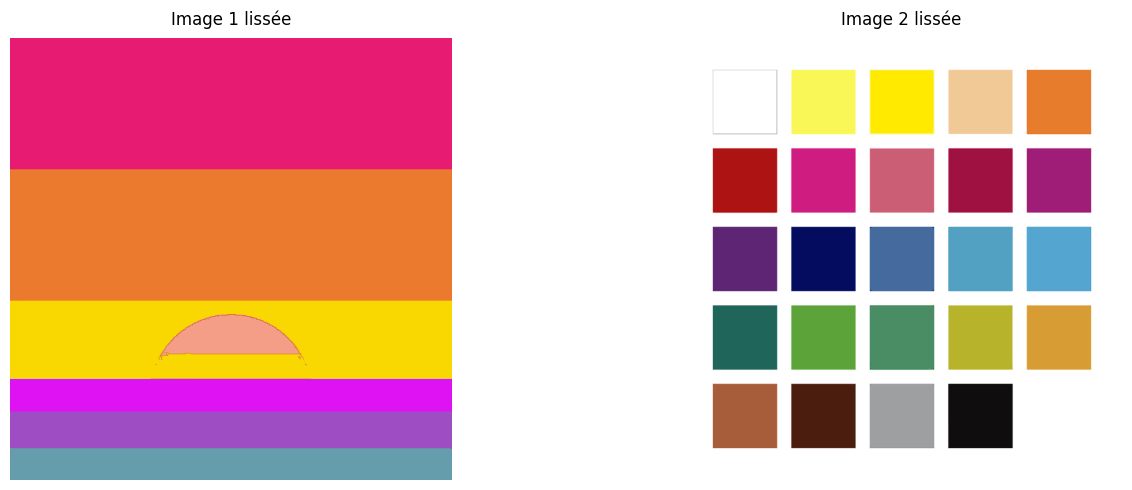

In [159]:
seuil = 100
start_x, start_y = 0, 0

visited, not_visited, colors = floodFill(W1, H1, start_x, start_y, seuil, px1, px3)
visited, not_visited, colors = floodFill(W2, H2, start_x, start_y, seuil, px4, px6)
afficher_images(
    [im3, im6],
    titres=['Image 1 lissée', 'Image 2 lissée'],
    disposition='ligne'
)

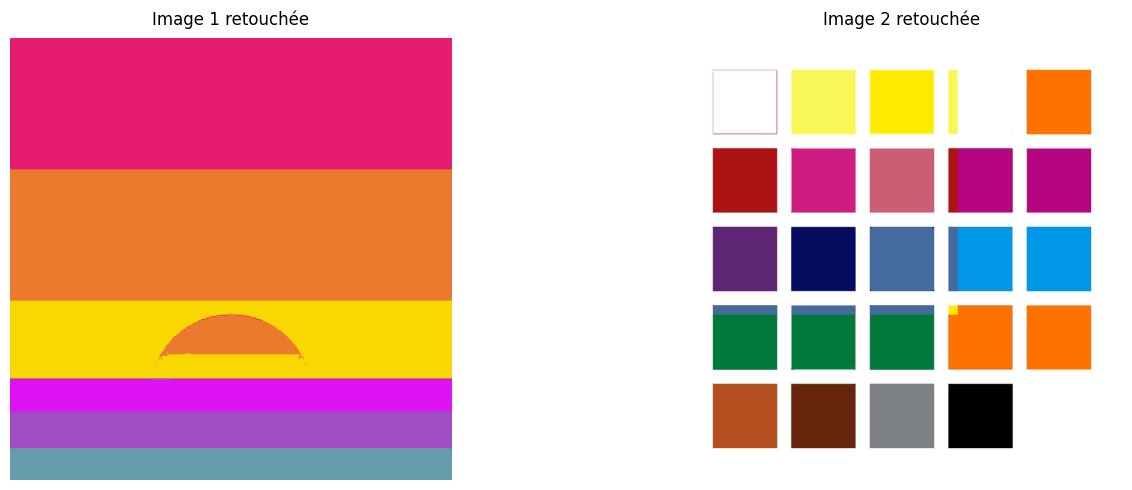

In [160]:
recoloriage(px3,px2,W1,H1,10)
recoloriage(px6,px5,W1,H1,10)

afficher_images(
    [im2, im5],
    titres=['Image 1 retouchée', 'Image 2 retouchée'],
    disposition='ligne'
)

In [161]:
score(px1,px2,W1,H1,1)
score(px4,px5,W2,H2,2)

Le score de l'image 1 est: 0.8674025019277546
Le score de l'image 2 est: 0.9249620814023384


Ici on a donc réussi à améliorer le score de l'image avec un pré-traitement de lissage avant le recoloriage par rapport à la méthode naïve

### Flou Gaussien


In [162]:
gauss3 = [[1,2,1],
          [2,4,2],
          [1,2,1]]

gauss7 = [[1,1,2,2,2,1,1],
          [1,2,2,4,2,2,1],
          [2,2,4,8,4,2,2],
          [2,4,8,16,8,4,2],
          [2,2,4,8,4,2,2],
          [1,2,2,4,2,2,1],
          [1,1,2,2,2,1,1]]

In [163]:
def somme_matrice(m: list = []) -> float:

    s = 0
    for e in m:
        for k in e:
            s += k
    return s

In [164]:
def convolution(px, W: int, H: int, m: list) -> None:
    w = len(m)
    h = len(m[0])
    wp = int ((w-1)/2)
    hp = int((h-1)/2)
    for x in range (wp,W-wp):
        for y in range(hp,H-hp):
            c1 = 0
            c2 = 0
            c3 = 0
            for i in range (-wp,wp + 1):
                for j in range (-hp, hp + 1):
                    c1 += px[x+i,y+j][0]*m[i + wp][j + wp]
                    c2 += px[x+i,y+j][1]*m[i + wp][j + wp]
                    c3 += px[x+i,y+j][2]*m[i + wp][j + wp]

            c1 = c1//somme_matrice(m)
            c2 = c2//somme_matrice(m)
            c3 = c3//somme_matrice(m)
            px[x,y] = c1,c2,c3      

In [165]:
im3 = im1
im6 = im4

convolution(px3, W1, H1, gauss7)
convolution(px6, W2, H2, gauss7)

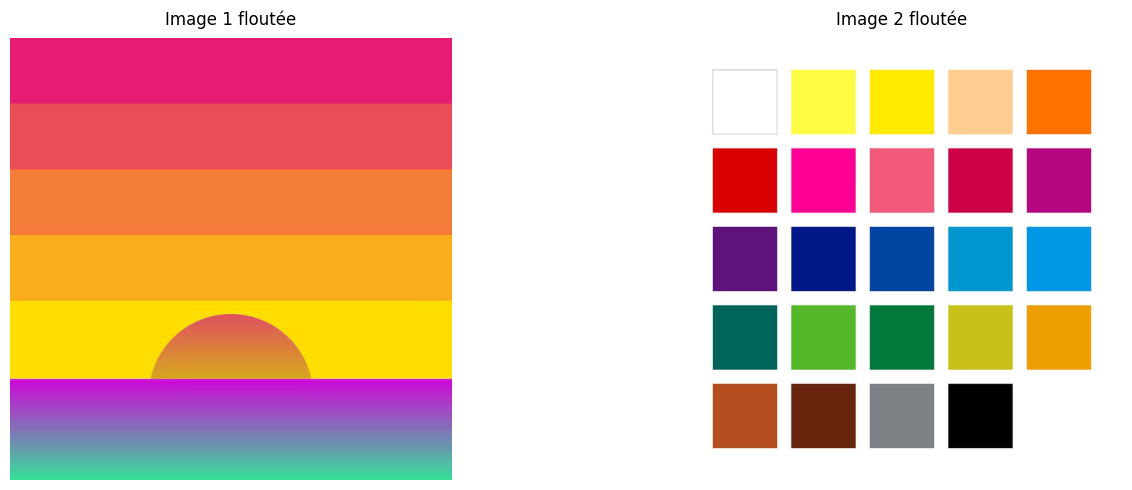

In [166]:
afficher_images(
    [im3, im6],
    titres=['Image 1 floutée', 'Image 2 floutée'],
    disposition='ligne'
)

In [167]:
k = 10
C1 = choix_palette(k,px3,W1,H1)
C2 = choix_palette(k,px6,W2,H2)

def draw_rectangle(rgb_color):
    color = f'rgb({rgb_color[0]}, {rgb_color[1]}, {rgb_color[2]})'
    html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{color}" /></svg>'
    return html

html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{f'rgb({C2[0][0][0]}, {C2[0][0][1]}, {C2[0][0][2]})'}" /></svg>'
for i in range (1,k):
    html += draw_rectangle(C1[i][0])
display(HTML(html))

html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{f'rgb({C2[0][0][0]}, {C2[0][0][1]}, {C2[0][0][2]})'}" /></svg>'
for i in range (1,k):
    html += draw_rectangle(C2[i][0])
display(HTML(html))


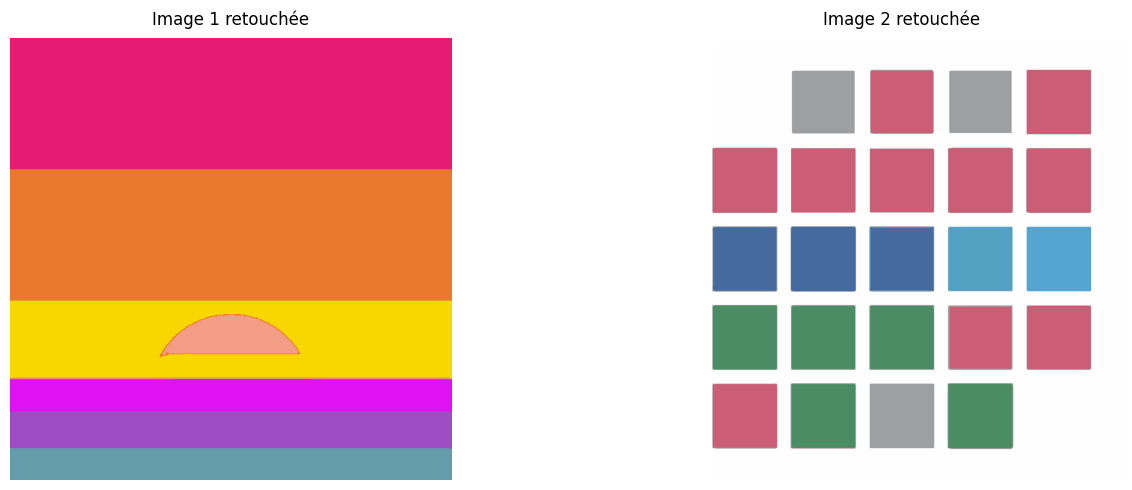

In [168]:
recoloriage(px3,px2,W1,H1,10)
recoloriage(px6,px5,W2,H2,10)

afficher_images(
    [im2, im5],
    titres=['Image 1 retouchée', 'Image 2 retouchée'],
    disposition='ligne'
)

In [169]:
score(px1,px2,W1,H1,1)
score(px4,px5,W2,H2,2)

Le score de l'image 1 est: 0.861242837209088
Le score de l'image 2 est: 0.7830483686288254


Dans le cas de l'image 2, le flou gaussien détériore le resultat. Le flou gaussien ne smeble donc pas, dans certains cas, être un choix pertinent

## Calcul de distance entre deux couleurs: 2 nouvelles méthodes proposées

### Première méthode: Distance RGB pondérée
L'idée est de mofifier le calcul de distance en prenant en compte la perception humaine

In [170]:
from math import sqrt

def distance_rgb_ponderee(c1, c2):
    r1, g1, b1 = c1
    r2, g2, b2 = c2
    r_mean = (r1 + r2) / 2
    delta_r = r2 - r1
    delta_g = g2 - g1
    delta_b = b2 - b1
    
    return sqrt(
        (2 + r_mean/256) * delta_r**2 +
        4 * delta_g**2 +
        (2 + (255-r_mean)/256) * delta_b**2
    )

On utilise encore la méthode naïve de choix de la palette pour comparer les résultats

In [171]:
def recoloriage3(px,px2,W,H,k):
    C = choix_palette(k,px,W,H)
    for x in range(W):
        for y in range (H):
            choix = C[0][0]
            for c in C:
                if distance_rgb_ponderee(px[x,y],choix) > distance_rgb_ponderee(px[x,y],c[0]):
                    choix = c[0]
            px2[x,y] = choix

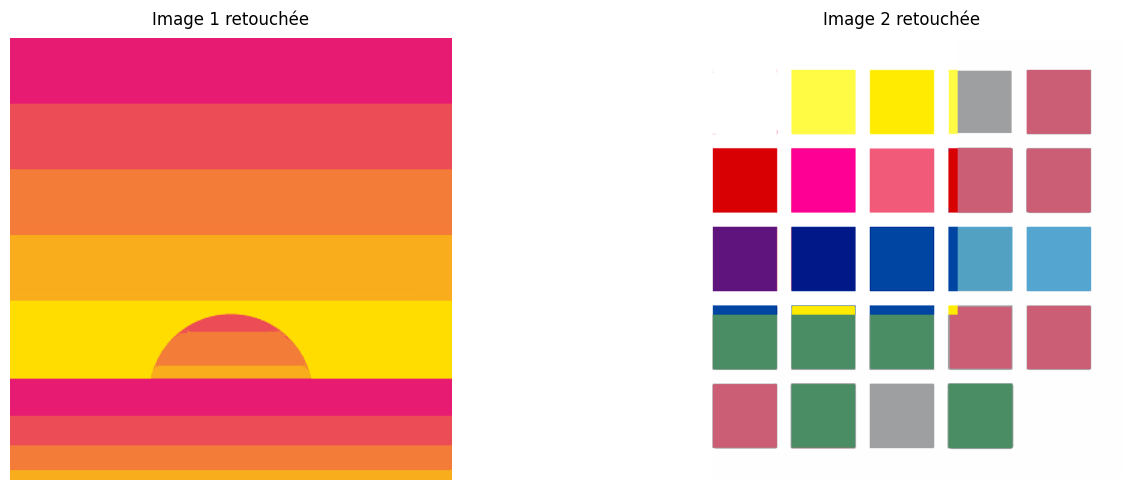

In [172]:
recoloriage3(px1,px2,W1,H1,10)
recoloriage3(px4,px5,W1,H1,10)

afficher_images(
    [im2, im5],
    titres=['Image 1 retouchée', 'Image 2 retouchée'],
    disposition='ligne'
)

In [173]:
def score_rgb(px,px2,W,H,k):
    S = 0
    N = W*H
    for x in range (W):
        for y in range (H):
            S += distance_rgb_ponderee(px[x,y],px2[x,y])
    print(f"Le score de l'image {k} est:", (256 - S/N)/256)

In [174]:
score_rgb(px1,px2,W1,H1,1)
score_rgb(px4,px5,W2,H2,2)

Le score de l'image 1 est: 0.7629293517120905
Le score de l'image 2 est: 0.7606655488353479


### Deuxième méthode: Distance LAB

In [175]:
from math import sqrt
# Ici aide de CLaude AI pour la compréhension de la conversion du RGB en LAB
def rgb_to_lab(r, g, b):
    """Convertit RGB (0-255) en LAB"""
    
    # 1. RGB vers RGB normalisé (0-1)
    r, g, b = r/255.0, g/255.0, b/255.0
    
    # 2. Correction gamma (RGB vers RGB linéaire)
    def gamma_correction(c):
        return ((c + 0.055) / 1.055) ** 2.4 if c > 0.04045 else c / 12.92
    
    r = gamma_correction(r)
    g = gamma_correction(g)
    b = gamma_correction(b)
    
    # 3. RGB linéaire vers XYZ (matrice sRGB)
    x = r * 0.4124564 + g * 0.3575761 + b * 0.1804375
    y = r * 0.2126729 + g * 0.7151522 + b * 0.0721750
    z = r * 0.0193339 + g * 0.1191920 + b * 0.9503041
    
    # 4. XYZ vers LAB (illuminant D65)
    x = x / 0.95047
    y = y / 1.00000
    z = z / 1.08883
    
    def f(t):
        return t ** (1/3) if t > 0.008856 else (7.787 * t) + (16/116)
    
    x = f(x)
    y = f(y)
    z = f(z)
    
    L = (116 * y) - 16
    a = 500 * (x - y)
    b_lab = 200 * (y - z)
    
    return (L, a, b_lab)

def distance_lab(c1, c2):
    L1, a1, b1 = rgb_to_lab(*c1)
    L2, a2, b2 = rgb_to_lab(*c2)
    
    return sqrt((L2-L1)**2 + (a2-a1)**2 + (b2-b1)**2)

In [176]:
def recoloriage4(px,px2,W,H,k):
    C = choix_palette(k,px,W,H)
    for x in range(W):
        for y in range (H):
            choix = C[0][0]
            for c in C:
                if distance_lab(px[x,y],choix) > distance_lab(px[x,y],c[0]):
                    choix = c[0]
            px2[x,y] = choix



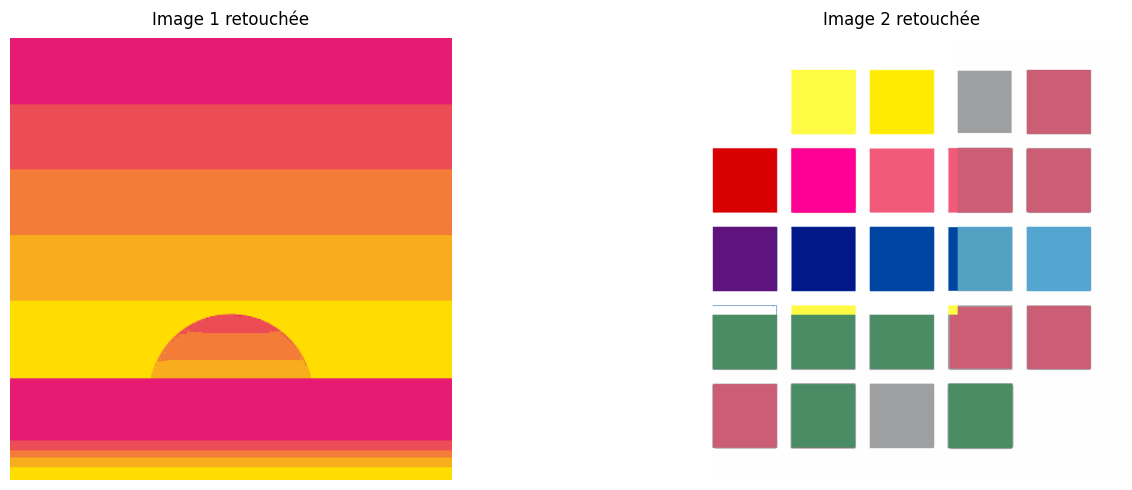

In [177]:
recoloriage4(px1,px2,W1,H1,10)
recoloriage4(px4,px5,W1,H1,10)

afficher_images(
    [im2, im5],
    titres=['Image 1 retouchée', 'Image 2 retouchée'],
    disposition='ligne'
)

In [178]:
def score_lab(px,px2,W,H,k):
    S = 0
    N = W*H
    for x in range (W):
        for y in range (H):
            S += distance_lab(px[x,y],px2[x,y])
    print(f"Le score de l'image {k} est:", (256 - S/N)/256)

In [179]:
score_lab(px1,px2,W1,H1,1)
score_lab(px4,px5,W2,H2,2)

Le score de l'image 1 est: 0.931323002618337
Le score de l'image 2 est: 0.942148227425682


Avec ces deux méthodes, le score de l'image ne semble pas s

### Comparaison des méthodes décrites précédemment

| Méthode | Complexité temporelle | Complexité spatiale | Avantages | Inconvénients |
|---------|----------------------|---------------------|-----------|---------------|
| Recoloriage naïf | O(W×H×k) | O(W×H) | Simple | Lent pour grande palette |
| Palette naïve | O(W×H + k log k) | O(couleurs_uniques) | Rapide, peu de mémoire | Couleurs pas représentatives |
| Palette K-means | O(W×H×k×iter) | O(W×H) | Couleurs représentatives optimales | Plus lent, besoin sklearn (j'ai eu des problèmes pour l'installer sur pc...) |
| Distance RGB | O(1) | O(1) | Très rapide | Moins uniforme |
| Distance LAB (sans cache) | O(1) | O(1) | Perceptuellement correct | Calculs complexes répétés |

Parmi le calcul de distance, le choix de la palette et le recoloriage, le choix de la palette semble celui posant le plus de problème et entraine un mauvais "résumé" de l'image de départ: On se propose ici de l'améliorer

On se propose d'utiliser l'algorithme des K-moyens pour construire une palette représentative

In [180]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np

def choix_palette_kmeans(image, n_colors):
    img_array = np.array(image)
    pixels = img_array.reshape(-1, 3) 
    
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    # Les centres des clusters sont les couleurs représentatives
    colors = kmeans.cluster_centers_.astype(int)
    
    # Compter combien de pixels sont assignés à chaque cluster
    labels = kmeans.labels_
    counts = Counter(labels)
    
    # Retourner au format de votre code (couleur, fréquence)
    palette = [((int(colors[i][0]), int(colors[i][1]), int(colors[i][2])), counts[i]) 
               for i in range(n_colors)]
    
    return palette

In [181]:
def recoloriage5(im,px,px2,W,H,k):
    C = choix_palette_kmeans(im,k)
    for x in range(W):
        for y in range (H):
            choix = C[0][0]
            for c in C:
                if distance_rgb_ponderee(px[x,y],choix) > distance_rgb_ponderee(px[x,y],c[0]):
                    choix = c[0]
            px2[x,y] = choix

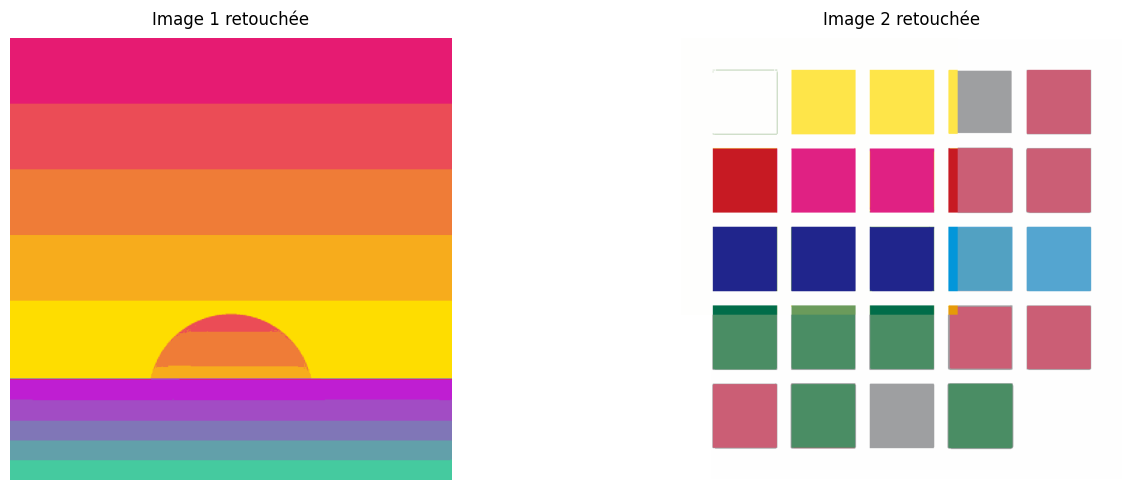

In [182]:
recoloriage5(im1,px1,px2,W1,H1,10)
recoloriage5(im4,px4,px5,W1,H1,10)

afficher_images(
    [im2, im5],
    titres=['Image 1 retouchée', 'Image 2 retouchée'],
    disposition='ligne'
)

In [183]:
score_rgb(px1,px2,W1,H1,1)
score_rgb(px4,px5,W2,H2,2)

Le score de l'image 1 est: 0.9552617998641758
Le score de l'image 2 est: 0.7138620127289836


La nouvelle méthode de choix de palette est très concluante pour l'image 1 puisqu'il permet d'obtenir sensiblment le même score qu'avec la méthode quantize mais ne fonctionne pas pour l'image 2.

En conclusion, pour la première image l'lagorithme K-means avec distance_rgb permet les meilleurs résutats (sans prendre en compte la complexité) alors que pour la deuxième image, la deuxième méthode de choix de la palette est la plus concluante.